In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import scipy.stats as stats

import os
from census import Census
from pprint import pprint
# Census API Key
from config import api_key

buz_info  = 44021
zipcode = pd.read_csv("Resources/Public_ZipCode.csv")
zipcode2 = pd.read_csv("Resources/charter_df.csv")
zipcode.head()

,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013.0
1,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013.0
2,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616.0
3,Meigs Primary School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",NC,Middleport,OH,45760,9717.0
4,Meigs Intermediate School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",70.394,Middleport,OH,45760,9717.0


In [2]:
#API CALL
#zipcode[["zipcode","extra"]] = zipcode["Zip Code"].str.split("-",expand=True)
zcode = zipcode['Zip Code']
zip_pd = pd.DataFrame(zcode)

zcode2 = zipcode2['Zip Code']
zip_pd2 = pd.DataFrame(zcode2)

zip_pd2.head()

,Zip Code
0,45404
1,45207
2,43537
3,44115
4,44663


In [3]:
zip_pd.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

In [4]:
zcode.head()

0    45810
1    45810
2    44870
3    45760
4    45760
Name: Zip Code, dtype: int64

In [5]:
list(zcode)

[45810,
 45810,
 44870,
 45760,
 45760,
 45013,
 43802,
 43207,
 45656,
 45656,
 45369,
 45503,
 45404,
 45207,
 45631,
 45669,
 43011,
 43901,
 45628,
 43537,
 44122,
 45601,
 44121,
 43604,
 44115,
 44663,
 43344,
 45710,
 44133,
 44857,
 44644,
 43207,
 45414,
 44320,
 44709,
 43604,
 44130,
 44502,
 43609,
 44484,
 45237,
 44883,
 45710,
 44134,
 44111,
 44102,
 44134,
 44134,
 43613,
 44503,
 44817,
 44055,
 45859,
 44256,
 43302,
 43302,
 43430,
 44306,
 44311,
 45850,
 44255,
 44255,
 43138,
 43138,
 43138,
 44030,
 44030,
 44906,
 45601,
 44805,
 44707,
 43920,
 45640,
 43219,
 45850,
 45144,
 45144,
 45651,
 44601,
 45801,
 45212,
 45804,
 44132,
 44102,
 45036,
 45036,
 43229,
 45101,
 43119,
 43227,
 45505,
 43229,
 43207,
 45155,
 44555,
 44134,
 43102,
 44111,
 44123,
 43615,
 45044,
 43229,
 43205,
 43232,
 43204,
 45214,
 44112,
 43102,
 44102,
 45202,
 45410,
 45102,
 45103,
 45224,
 44052,
 43207,
 45103,
 45801,
 43207,
 44485,
 45711,
 45415,
 44509,
 44077,
 43614,


In [6]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels

# set up a parameters dictionary
ZIPCODE = []
PAYANN = []



for code in zcode:  
  
    # base url
    query_url = f"https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:{code}&key={api_key}"
    
    print(query_url) 
    
    #response = requests.get(base_url).json()
  
    
    #Run requests to grab the JSON at the requested URL
    
    response = requests.get(query_url)
    print(response.status_code)
    
    if response.status_code == 200:
        jsonResponse = response.json()
        ZIPCODE.append(jsonResponse[1][0])       
        PAYANN.append(jsonResponse[1][2]) 
        
        
#pprint(response)

#ZIPCODE
#print(EMPSZES)       
#PAYANN


https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45810&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45810&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44870&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45760&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45760&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45013&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43802&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43207&k

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44030&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44030&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44906&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45601&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:447

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44646&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44270&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45236&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43231&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45255&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:448

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45814&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44321&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44135&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43003&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:440

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43920&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45434&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45419&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44146&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43213&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45218&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44704&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:439

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44106&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45237&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44264&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45306&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45306&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44120&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44118&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:446

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44514&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45680&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43567&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43204&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43609&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44021&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44822&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:453

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43560&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43140&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45040&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44663&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43545&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45042&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44890&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:456

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45066&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44720&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45103&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45420&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45013&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44217&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44212&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44408&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45832&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45832&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:442

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43512&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44721&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45238&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44620&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43515&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43515&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:435

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43211&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43065&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43065&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43920&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43016&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43026&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44307&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:444

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45331&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43085&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43205&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44137&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44104&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45772&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45613&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43001&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45807&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45312&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:442

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45669&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44313&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45365&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45365&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44662&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43213&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44077&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:452

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44301&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44256&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45623&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44820&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44270&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45895&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:458

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44111&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44104&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44109&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45358&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43210&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44256&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45405&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43223&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43968&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44146&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43739&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43762&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44108&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43551&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43610&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45662&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:457

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44710&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43302&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45631&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45629&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45629&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:448

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44870&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44110&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45623&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45623&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43931&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44708&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43326&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:440

SSLError: ("bad handshake: SysCallError(-1, 'Unexpected EOF')",)

In [7]:
ZIPCODE2 = []
PAYANN2 = []



for code in zcode2:  
  
    # base url
    query_url = f"https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:{code}&key={api_key}"
    
    print(query_url) 
    
    #response = requests.get(base_url).json()
  
    
    #Run requests to grab the JSON at the requested URL
    response2 = requests.get(query_url)
    print(response2.status_code)
    
    if response2.status_code == 200:
        jsonResponse2 = response2.json()
        ZIPCODE2.append(jsonResponse2[1][0])       
        PAYANN2.append(jsonResponse2[1][2]) 
        
   

https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45404&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45207&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43537&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44115&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44663&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43207&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45414&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44320&k

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44109&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43612&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44509&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44103&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43228&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:430

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44105&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43701&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43227&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44883&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44304&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44130&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44507&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:446

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43205&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43945&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43609&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44128&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45212&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44119&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:443

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44105&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43229&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43204&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45426&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43607&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44135&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:436

In [8]:
# create dataframe
public_payfoll_by_ZIP_df = pd.DataFrame({"ZIPCODE": ZIPCODE,"Public Total Annual Payroll": PAYANN})
public_payfoll_by_ZIP_df.tail()

,Public Total Annual Payroll,ZIPCODE
1275,573316,44483
1276,428516,43204
1277,79810,45506
1278,379583,43725
1279,53705,44108


In [69]:
charter_payfoll_by_ZIP_df = pd.DataFrame({"ZIPCODE": ZIPCODE2,"Charter Total Annual Payroll": PAYANN2})
charter_payfoll_by_ZIP_df.tail()

,Charter Total Annual Payroll,ZIPCODE
270,299452,43078
271,743805,43302
272,124384,44052
273,0,43337
274,685344,45801


In [10]:
csvpath = "Resources/Public_School_Data.csv"
raw_data = pd.read_csv(csvpath)
charter_schools_data = pd.read_csv("Resources/1617_CS_ACHIEVEMENT.csv") 

In [11]:
#Public and Charter School Datat
public_df = raw_data[["Building Name", "District Name", "County", "City, State, Zip Code", "Performance Index Score 2015-16"]]
charter_schools_df = charter_schools_data.loc[:, ['Building Name', 'District Name', 'County', 'City and Zip Code', 'Performance Index Percent 2016-17']]                                


In [12]:
charter_schools_df[["City", "State", "Zip Code"]] = charter_schools_df["City and Zip Code"].str.split(",",expand=True).rename(columns=lambda x: f"string_{x+1}")
charter_schools_df.head()

,Building Name,District Name,County,City and Zip Code,Performance Index Percent 2016-17,City,State,Zip Code
0,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",66.2,Dayton,OH,45404-2123
1,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",53.8,Cincinnati,OH,45207-1644
2,Wildwood Environmental Academy,Wildwood Environmental Academy,Lucas,"Maumee, OH, 43537-1374",61.7,Maumee,OH,43537-1374
3,"Ohio Connections Academy, Inc","Ohio Connections Academy, Inc",Cuyahoga,"Cleveland, OH, 44115-2229",64.7,Cleveland,OH,44115-2229
4,Quaker Digital Academy,New Philadelphia City,Tuscarawas,"New Philadelphia, OH, 44663-2150",54.5,New Philadelphia,OH,44663-2150


In [13]:
charter_schools_df[["City", "State", "Zip Code"]] = charter_schools_df["City and Zip Code"].str.split(",",expand=True).rename(columns=lambda x: f"string_{x+1}")
charter_schools_df[["Zip Code", "Code+4"]] = charter_schools_df["Zip Code"].str.split("-",expand=True).rename(columns=lambda x: f"string_{x+1}")
charter_schools_df.head()


,Building Name,District Name,County,City and Zip Code,Performance Index Percent 2016-17,City,State,Zip Code,Code+4
0,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",66.2,Dayton,OH,45404,2123
1,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",53.8,Cincinnati,OH,45207,1644
2,Wildwood Environmental Academy,Wildwood Environmental Academy,Lucas,"Maumee, OH, 43537-1374",61.7,Maumee,OH,43537,1374
3,"Ohio Connections Academy, Inc","Ohio Connections Academy, Inc",Cuyahoga,"Cleveland, OH, 44115-2229",64.7,Cleveland,OH,44115,2229
4,Quaker Digital Academy,New Philadelphia City,Tuscarawas,"New Philadelphia, OH, 44663-2150",54.5,New Philadelphia,OH,44663,2150


In [14]:
public_df[["City","State", "Zip Code"]] = public_df["City, State, Zip Code"].str.split(",",expand=True)
public_df[["Zip Code", "Code+4"]] = public_df["Zip Code"].str.split("-",expand=True)
public_df.head()

/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013
1,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013
2,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616
3,Meigs Primary School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",NC,Middleport,OH,45760,9717
4,Meigs Intermediate School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",70.394,Middleport,OH,45760,9717


In [15]:
public_df.to_csv("Resources/Public_ZipCode.csv", index=False, header=True)

In [61]:
public_payfoll= public_payfoll_by_ZIP_df.rename(columns={"ZIPCODE": "Zip Code"})
public_payfoll.head()

,Public Total Annual Payroll,Zip Code
0,77875,45810
1,77875,45810
2,894118,44870
3,9171,45760
4,9171,45760


In [17]:
public_df.head()

,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013
1,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013
2,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616
3,Meigs Primary School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",NC,Middleport,OH,45760,9717
4,Meigs Intermediate School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",70.394,Middleport,OH,45760,9717


In [18]:
public_df["Zip Code"]= public_df["Zip Code"].astype(int)
public_payfoll["Zip Code"]=public_payfoll["Zip Code"].astype(int)
public_payfoll.dtypes

/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Public Total Annual Payroll    object
Zip Code                        int64
dtype: object

In [19]:
#Problems Merging
public_pay_df= public_df.merge(public_payfoll, on="Zip Code")
public_pay_df.head()

,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4,Public Total Annual Payroll
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013,77875
1,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013,77875
2,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013,77875
3,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013,77875
4,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616,894118


In [20]:
charter_payfoll= charter_payfoll_by_ZIP_df.rename(columns={"ZIPCODE": "Zip Code"})
charter_schools_df["Zip Code"]= charter_schools_df["Zip Code"].astype(int)
charter_payfoll["Zip Code"]=charter_payfoll["Zip Code"].astype(int)                                                                     
charter_pay_df = pd.merge(charter_schools_df, public_payfoll, on="Zip Code")
charter_pay_df.head()

,Building Name,District Name,County,City and Zip Code,Performance Index Percent 2016-17,City,State,Zip Code,Code+4,Public Total Annual Payroll
0,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",66.2,Dayton,OH,45404,2123,615078
1,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",66.2,Dayton,OH,45404,2123,615078
2,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",53.8,Cincinnati,OH,45207,1644,137872
3,Wildwood Environmental Academy,Wildwood Environmental Academy,Lucas,"Maumee, OH, 43537-1374",61.7,Maumee,OH,43537,1374,1360272
4,Wildwood Environmental Academy,Wildwood Environmental Academy,Lucas,"Maumee, OH, 43537-1374",61.7,Maumee,OH,43537,1374,1360272


In [21]:
public_df = public_df.loc[public_df["Performance Index Score 2015-16"] != "NC"]
charter_schools_df = charter_schools_df.loc[charter_schools_df["Performance Index Percent 2016-17"] != "NC"]
public_df["Performance Index Score 2015-16"]=public_df["Performance Index Score 2015-16"].astype(float)
charter_schools_df['Performance Index Percent 2016-17']=charter_schools_df['Performance Index Percent 2016-17'].astype(float)

In [22]:
#Ethnicity/Race Data
csvpath2 = "Resources/Ethnicity.csv"
raw_data_race = pd.read_csv(csvpath2)
ethnic_df = pd.read_csv(csvpath2)
    


/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
### Replace the >95
race_df = raw_data_race[["Building Name", "Student Group","% of Total Enrollment"]]
race_df = race_df.replace(to_replace = "NC", value = 0)
race_df["% of Total Enrollment"]= race_df["% of Total Enrollment"].astype(str)
race_df["% of Total Enrollment"] = race_df["% of Total Enrollment"].replace(to_replace = r'>95', value = 95.1, regex=True)
race_df["% of Total Enrollment"]=race_df["% of Total Enrollment"].astype(float)


In [24]:

df_white = race_df.loc[race_df["Student Group"] == "White", :]
df_latinx = race_df.loc[race_df["Student Group"] == "Hispanic", :]
df_black = race_df.loc[race_df["Student Group"] == "Black", :]

In [25]:
race_df.head(30)

,Building Name,Student Group,% of Total Enrollment
0,Ada Elementary School,American Indian or Alaskan Native,0.0
1,Ada Elementary School,Asian or Pacific Islander,0.0
2,Ada Elementary School,Black,3.4
3,Ada Elementary School,Hispanic,0.0
4,Ada Elementary School,Multiracial,0.0
5,Ada Elementary School,White,92.5
6,Ada High School,American Indian or Alaskan Native,0.0
7,Ada High School,Asian or Pacific Islander,0.0
8,Ada High School,Black,0.0
9,Ada High School,Hispanic,0.0


In [26]:
public_race_white = df_white.merge(public_df, on="Building Name")
public_race_latinx = df_latinx.merge(public_df, on="Building Name")
public_race_black = df_black.merge(public_df, on="Building Name")

charterwhite_df = pd.merge(charter_schools_df, df_white, on="Building Name") 
charterblack_df = pd.merge(charter_schools_df, df_black, on="Building Name") 
charterhispanic_df = pd.merge(charter_schools_df, df_latinx, on="Building Name") 

In [27]:
#Econ Data
csvpath3 = "Resources/Economic.csv"
raw_data_econ = pd.read_csv(csvpath3)
raw_data_econ.head()

,Building IRN,Building Name,District IRN,District Name,County,Region,Open/Closed Status as of 9/12/2017,School Type,Student Group,Read 3rd Grade 2016-2017 % Proficient or above,...,Geometry End of Course 2016-2017 % Proficient or Above,Integrated Math I End of Course 2016-2017 % Proficient or Above,Integrated Math II End of Course 2016-2017 % Proficient or Above,Biology End of Course 2016-2017 % Proficient or Above,Attendance rate 2016-2017,4-Year Longitudinal Graduation Rate - Class of 2016,5-Year Longitudinal Graduation Rate - Class of 2015,Enrollment,% of Total Enrollment,Watermark
0,59,Ada Elementary School,45187,Ada Exempted Village,Hardin,Region 6,Open,Elementary School,Disadvantaged,77.4,...,NC,NC,NC,NC,>95.0,NC,NC,201,43.2,NaN
1,59,Ada Elementary School,45187,Ada Exempted Village,Hardin,Region 6,Open,Elementary School,NonDisadvantaged,92.3,...,NC,NC,NC,NC,>95.0,NC,NC,264,56.8,NaN
2,67,Ada High School,45187,Ada Exempted Village,Hardin,Region 6,Open,High School,Disadvantaged,NC,...,56.0,NC,NC,75.0,92.6,78.9,92.3,155,39.7,NaN
3,67,Ada High School,45187,Ada Exempted Village,Hardin,Region 6,Open,High School,NonDisadvantaged,NC,...,62.9,NC,NC,89.6,94.7,>95.0,94.0,235,60.3,NaN
4,83,Sandusky Middle School,44743,Sandusky City,Erie,Region 2,Open,Middle School,Disadvantaged,NC,...,NC,NC,NC,NC,94.0,NC,NC,443,>95.0,NaN


In [28]:


econ_df = raw_data_econ[["Building Name", "Student Group","% of Total Enrollment"]]
econ_df = econ_df.replace(to_replace = "NC", value = 0)
econ_df["% of Total Enrollment"]= econ_df["% of Total Enrollment"].astype(str)
econ_df["% of Total Enrollment"] = econ_df["% of Total Enrollment"].replace(to_replace = r'>95', value = 95.1, regex=True)
econ_df["% of Total Enrollment"]=econ_df["% of Total Enrollment"].astype(float)

In [29]:
df_poor = econ_df.loc[econ_df["Student Group"] == "Disadvantaged", :]
df_notpoor = econ_df.loc[econ_df["Student Group"] == "NonDisadvantaged", :]

In [30]:
public_poor_df = df_poor.merge(public_df, on="Building Name")
public_notpoor_df = df_notpoor.merge(public_df, on="Building Name")

charter_disadvantaged = pd.merge(charter_schools_df, df_poor, on="Building Name")
charter_nondisadvantaged = pd.merge(charter_schools_df, df_notpoor, on="Building Name")

In [31]:
#Data to analyze 
public_black_cuya = public_race_black.loc[public_race_black["County"] == "Cuyahoga", :]
public_white_cuya =  public_race_white.loc[public_race_white["County"] == "Cuyahoga", :]
public_latinx_cuya =  public_race_latinx.loc[public_race_latinx["County"] == "Cuyahoga", :]
public_poor_cuya = public_poor_df.loc[public_poor_df["County"] == "Cuyahoga", :]
public_notpoor_cuya = public_notpoor_df.loc[public_notpoor_df["County"] == "Cuyahoga", :]

charter_nondisadv_cuyahoga = charter_nondisadvantaged.loc[charter_nondisadvantaged["County"] == "Cuyahoga"]
charter_disadv_cuyahoga = charter_disadvantaged.loc[charter_disadvantaged["County"] == "Cuyahoga"]
charterwhite_cuyahoga = charterwhite_df.loc[charterwhite_df["County"] == "Cuyahoga"]
charterblack_cuyahoga = charterblack_df.loc[charterblack_df["County"] == "Cuyahoga"]
charterhispanic_cuyahoga = charterhispanic_df.loc[charterhispanic_df["County"] == "Cuyahoga"]

public_pay_cuya = public_pay_df.loc[public_pay_df["County"] == "Cuyahoga"]
charter_pay_cuya =charter_pay_df.loc[charter_pay_df["County"]== "Cuyahoga"]

In [62]:
public_pay_cuya["Performance Index Score 2015-16"] = public_pay_cuya["Performance Index Score 2015-16"].replace(to_replace = "NC", value = 0)

/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
charter_pay_cuya["Performance Index Percent 2016-17"] = charter_pay_cuya["Performance Index Percent 2016-17"].replace(to_replace = "NC", value = 0)

/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
public_pay_cuya["Performance Index Score 2015-16"] = public_pay_cuya["Performance Index Score 2015-16"].astype(float)
public_pay_cuya["Performance Index Score 2015-16"].head()

/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


433    43.903
434    43.903
435    43.903
436    43.903
437    43.903
Name: Performance Index Score 2015-16, dtype: float64

In [72]:
charter_pay_cuya["Performance Index Percent 2016-17"] = charter_pay_cuya["Performance Index Percent 2016-17"].astype(float)
charter_pay_cuya["Performance Index Percent 2016-17"].head()

/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


9      64.7
10     64.7
11     43.8
12     43.8
138    51.8
Name: Performance Index Percent 2016-17, dtype: float64

/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


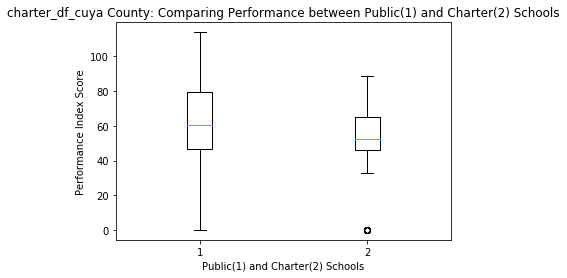

In [73]:
# t-test
public_df_cuya = public_df.loc[public_df["County"]== "Cuyahoga"]
charter_df_cuya = charter_schools_df.loc[charter_schools_df["County"]=="Cuyahoga"]
s1=public_pay_cuya["Performance Index Score 2015-16"]
s2=charter_pay_cuya["Performance Index Percent 2016-17"]

plt.boxplot([s1, s2])
plt.title("charter_df_cuya County: Comparing Performance between Public(1) and Charter(2) Schools")
plt.xlabel("Public(1) and Charter(2) Schools")
plt.ylabel("Performance Index Score")

fig1 = plt.gcf()
plt.show()

In [39]:
fig1.tight_layout()
fig1.savefig("Cuyahoga_Public_Charter_Box.png")
#plt.show()

In [40]:
(t_stat, p) = stats.ttest_ind(s1, s2, equal_var=False)
print(t_stat)
print(p)

9.16535353289
3.52766611919e-19


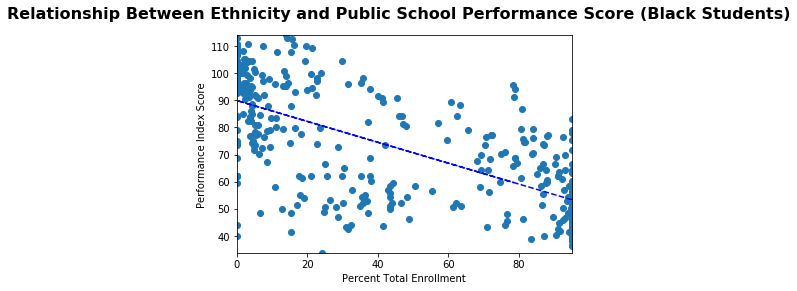

In [41]:
# Public Black Regression

x_cuy_blk = public_black_cuya["% of Total Enrollment"]
y_cuy_blk =public_black_cuya["Performance Index Score 2015-16"]

(cbk_slope, cbk_int, cbk_c_r, cbk_p, cbk_std_err) = stats.linregress(x_cuy_blk, y_cuy_blk)
fit = cbk_slope * x_cuy_blk + cbk_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Public School Performance Score (Black Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_cuy_blk), max(x_cuy_blk))
ax.set_ylim(min(y_cuy_blk), max(y_cuy_blk))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_cuy_blk, y_cuy_blk, linewidth=0, marker='o')
ax.plot(x_cuy_blk, fit, 'b--')

fig2 = plt.gcf()
plt.show()

In [42]:
fig2.tight_layout()
fig2.savefig("Cuyahoga_Public_Blk.png")
plt.show()

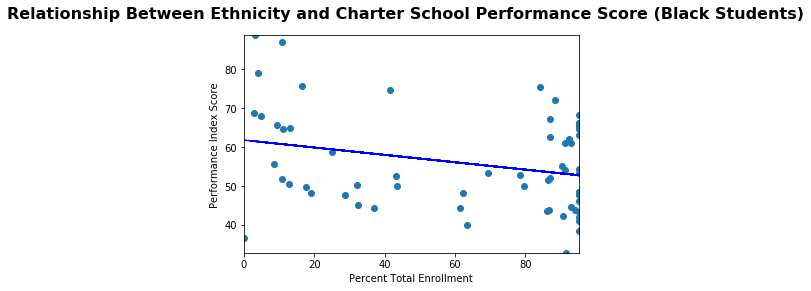

In [43]:
#Charter School Black Performance

x_cuy_blk2 =charterblack_cuyahoga["% of Total Enrollment"]
y_cuy_blk2 =charterblack_cuyahoga["Performance Index Percent 2016-17"]

(cbk2_slope, cbk2_int, cbk2_c_r, cbk2_p, cbk2_std_err) = stats.linregress(x_cuy_blk2, y_cuy_blk2)
fit = cbk2_slope * x_cuy_blk2 + cbk2_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Charter School Performance Score (Black Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_cuy_blk2), max(x_cuy_blk2))
ax.set_ylim(min(y_cuy_blk2), max(y_cuy_blk2))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_cuy_blk2, y_cuy_blk2, linewidth=0, marker='o')
ax.plot(x_cuy_blk2, fit, 'b--')

fig3 = plt.gcf()
plt.show()


In [44]:
fig3.tight_layout()
fig3.savefig("Cuyahoga_Charter_Blk.png")
plt.show()

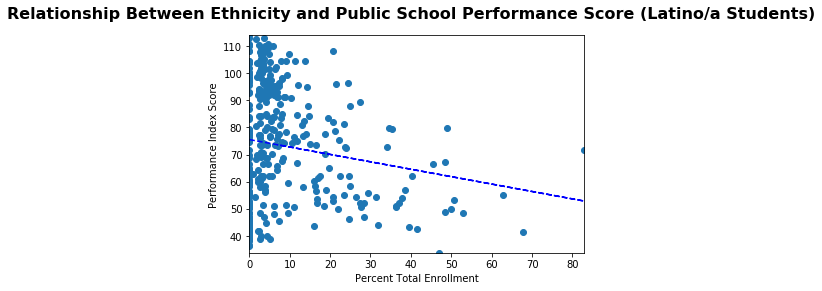

In [45]:
# Public Hispanix Regression

x_cuy_lat = public_latinx_cuya["% of Total Enrollment"]
y_cuy_lat =public_latinx_cuya["Performance Index Score 2015-16"]

(clk_slope, clk_int, clk_c_r, clk_p, clk_std_err) = stats.linregress(x_cuy_lat, y_cuy_lat)
fit = clk_slope * x_cuy_lat + clk_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Public School Performance Score (Latino/a Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_cuy_lat), max(x_cuy_lat))
ax.set_ylim(min(y_cuy_lat), max(y_cuy_lat))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_cuy_lat, y_cuy_lat, linewidth=0, marker='o')
ax.plot(x_cuy_lat, fit, 'b--')

fig4 = plt.gcf()
plt.show()

In [46]:
fig4.tight_layout()
fig4.savefig("Cuyahoga_Public_latino.png")
plt.show()

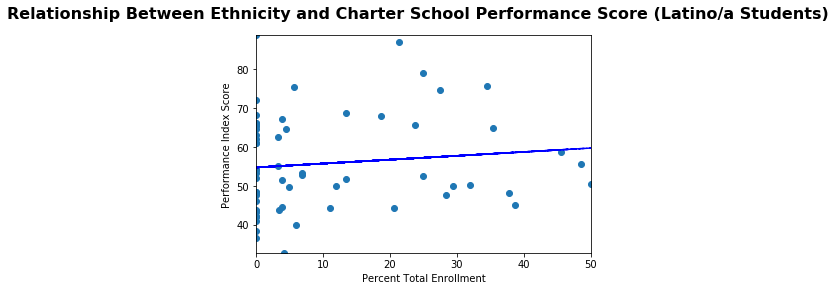

In [47]:
#Charter School Hispanic Performance

x_cuy_lat2 =charterhispanic_cuyahoga["% of Total Enrollment"]
y_cuy_lat2 =charterhispanic_cuyahoga["Performance Index Percent 2016-17"]

(clk2_slope, clk2_int, clk2_c_r, clk2_p, clk2_std_err) = stats.linregress(x_cuy_lat2, y_cuy_lat2)
fit = clk2_slope * x_cuy_lat2 + clk2_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Charter School Performance Score (Latino/a Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_cuy_lat2), max(x_cuy_lat2))
ax.set_ylim(min(y_cuy_lat2), max(y_cuy_lat2))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_cuy_lat2, y_cuy_lat2, linewidth=0, marker='o')
ax.plot(x_cuy_lat2, fit, 'b--')

fig5 = plt.gcf()
plt.show()

In [48]:
fig5.tight_layout()
fig5.savefig("Cuyahoga_Charter_latino.png")
plt.show()

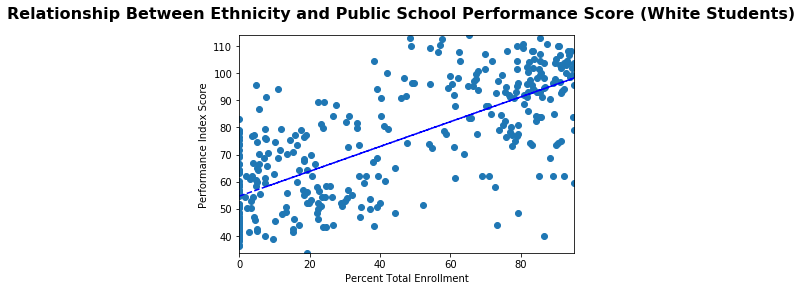

In [49]:
# Public White Regression

x_cuy_wh = public_white_cuya["% of Total Enrollment"]
y_cuy_wh =public_white_cuya["Performance Index Score 2015-16"]

(cwk_slope, cwk_int, cwk_c_r, cwk_p, cwk_std_err) = stats.linregress(x_cuy_wh, y_cuy_wh)
fit = cwk_slope * x_cuy_wh + cwk_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Public School Performance Score (White Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_cuy_wh), max(x_cuy_wh))
ax.set_ylim(min(y_cuy_wh), max(y_cuy_wh))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_cuy_wh, y_cuy_wh, linewidth=0, marker='o')
ax.plot(x_cuy_wh, fit, 'b--')

fig6 = plt.gcf()
plt.show()

In [50]:
fig6.tight_layout()
fig6.savefig("Cuyahoga_Public_white.png")
plt.show()

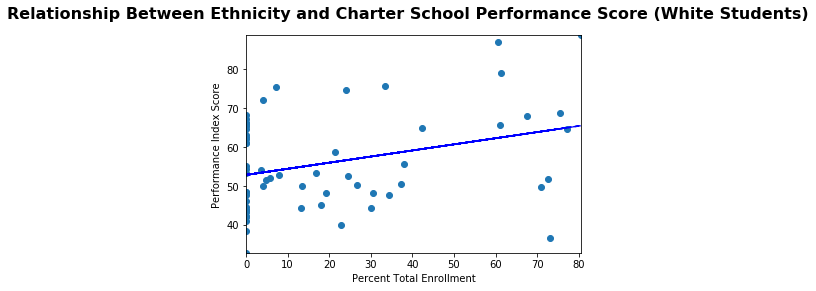

In [51]:
x_cuy_wh2 =charterwhite_cuyahoga["% of Total Enrollment"]
y_cuy_wh2 =charterwhite_cuyahoga["Performance Index Percent 2016-17"]

(cwk2_slope, cwk2_int, cwk2_c_r, cwk2_p, cwk2_std_err) = stats.linregress(x_cuy_wh2, y_cuy_wh2)
fit = cwk2_slope * x_cuy_wh2 + cwk2_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Charter School Performance Score (White Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_cuy_wh2), max(x_cuy_wh2))
ax.set_ylim(min(y_cuy_wh2), max(y_cuy_wh2))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_cuy_wh2, y_cuy_wh2, linewidth=0, marker='o')
ax.plot(x_cuy_wh2, fit, 'b--')

fig7 = plt.gcf()
plt.show()

In [52]:
fig7.tight_layout()
fig7.savefig("Cuyahoga_Charter_white.png")
plt.show()

In [74]:
charter_pay_cuya.columns

Index(['Building Name', 'District Name', 'County', 'City and Zip Code',
       'Performance Index Percent 2016-17', 'City', 'State', 'Zip Code',
       'Code+4', 'Public Total Annual Payroll'],
      dtype='object')

In [80]:
#charter_pay_ham = charter_pay_ham.loc[charter_pay_ham["Performance Index Score 2016-17"] != "NC"]
charter_pay_cuya["Public Total Annual Payroll"]=charter_pay_cuya["Public Total Annual Payroll"].astype(float)
charter_pay_cuya["Performance Index Percent 2016-17"]=charter_pay_cuya["Performance Index Percent 2016-17"].astype(float)


/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:


public_pay_cuya["Public Total Annual Payroll"]=public_pay_cuya["Public Total Annual Payroll"].astype(float)
public_pay_cuya["Performance Index Score 2015-16"]=public_pay_cuya["Performance Index Score 2015-16"].astype(float)


/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/theodoresmiley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


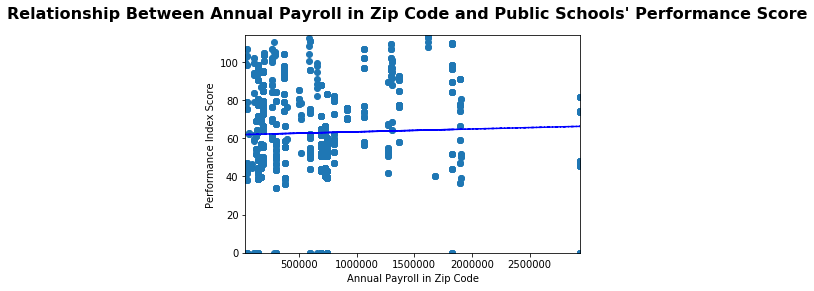

In [87]:
x_pub_pay_cuya =public_pay_cuya["Public Total Annual Payroll"]
y_pub_pay_cuya =public_pay_cuya["Performance Index Score 2015-16"]

(ppc_slope, ppc_int, ppc_c_r, ppc_p, ppc_std_err) = stats.linregress(x_pub_pay_cuya,y_pub_pay_cuya)
fit = ppc_slope * x_pub_pay_cuya + ppc_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Annual Payroll in Zip Code and Public Schools' Performance Score", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_pub_pay_cuya), max(x_pub_pay_cuya))
ax.set_ylim(min(y_pub_pay_cuya), max(y_pub_pay_cuya))

ax.set_xlabel("Annual Payroll in Zip Code")
ax.set_ylabel("Performance Index Score")

ax.plot(x_pub_pay_cuya,y_pub_pay_cuya, linewidth=0, marker='o')
ax.plot(x_pub_pay_cuya, fit, 'b--')

fig8 = plt.gcf()
plt.show()

In [88]:
fig8.tight_layout()
fig8.savefig("Cuyahoga_Public_Payroll.png")
plt.show()

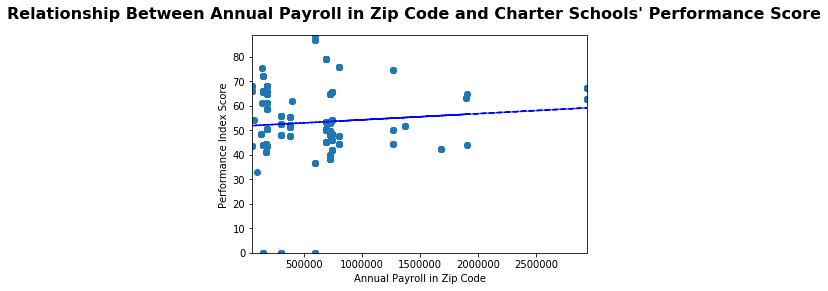

In [89]:
x_chart_pay_cuya =charter_pay_cuya["Public Total Annual Payroll"]
y_chart_pay_cuya =charter_pay_cuya["Performance Index Percent 2016-17"]

(ccp2_slope, ccp2_int, ccp2_c_r, ccp2_p, ccp2_std_err) = stats.linregress(x_chart_pay_cuya ,y_chart_pay_cuya)
fit = ccp2_slope * x_chart_pay_cuya  + ccp2_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Annual Payroll in Zip Code and Charter Schools' Performance Score", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_chart_pay_cuya ), max(x_chart_pay_cuya ))
ax.set_ylim(min(y_chart_pay_cuya), max(y_chart_pay_cuya))

ax.set_xlabel("Annual Payroll in Zip Code")
ax.set_ylabel("Performance Index Score")

ax.plot(x_chart_pay_cuya ,y_chart_pay_cuya, linewidth=0, marker='o')
ax.plot(x_chart_pay_cuya , fit, 'b--')

fig9 = plt.gcf()
plt.show()

In [90]:
fig9.tight_layout()
fig9.savefig("Cuyahoga_Charter_Payroll.png")
plt.show()

In [ ]:
public_black_frank = public_race_black.loc[public_race_black["County"] == "Franklin", :]
public_white_frank =  public_race_white.loc[public_race_white["County"] == "Franklin", :]
public_latinx_frank =  public_race_latinx.loc[public_race_latinx["County"] == "Franklin", :]
public_poor_frank = public_poor_df.loc[public_poor_df["County"] == "Franklin", :]
public_notpoor_frank = public_notpoor_df.loc[public_notpoor_df["County"] == "Franklin", :]

charter_nondisadv_franklin = charter_nondisadvantaged.loc[charter_nondisadvantaged["County"] == "Franklin"]
charter_disadv_franklin = charter_disadvantaged.loc[charter_disadvantaged["County"] == "Franklin"]
charterwhite_franklin = charterwhite_df.loc[charterwhite_df["County"] == "Franklin"]
charterblack_franklin = charterblack_df.loc[charterblack_df["County"] == "Franklin"]
charterhispanic_franklin = charterhispanic_df.loc[charterhispanic_df["County"] == "Franklin"]

public_pay_franklin = public_pay_df.loc[public_pay_df["County"] == "Franklin"]
charter_pay_franklin =charter_pay_df.loc[charter_pay_df["County"]== "Franklin"]

In [ ]:
public_black_ham = public_race_black.loc[public_race_black["County"] == "Hamilton", :]
public_white_ham =  public_race_white.loc[public_race_white["County"] == "Hamilton", :]
public_latinx_ham =  public_race_latinx.loc[public_race_latinx["County"] == "Hamilton", :]
public_poor_ham = public_poor_df.loc[public_poor_df["County"] == "Hamilton", :]
public_notpoor_ham = public_notpoor_df.loc[public_notpoor_df["County"] == "Hamilton", :]

charter_nondisadv_hamilton = charter_nondisadvantaged.loc[charter_nondisadvantaged["County"] == "Hamilton"]
charter_disadv_hamilton = charter_disadvantaged.loc[charter_disadvantaged["County"] == "Hamilton"]
charterwhite_hamilton = charterwhite_df.loc[charterhispanic_df["County"] == "Hamilton"]
charterblack_hamilton = charterblack_df.loc[charterblack_df["County"] == "Hamilton"]
charterhispanic_hamilton = charterhispanic_df.loc[charterblack_df["County"] == "Hamilton"]

public_pay_ham = public_pay_df.loc[public_pay_df["County"] == "Hamilton"]
charter_pay_ham =charter_pay_df.loc[charter_pay_df["County"]== "Franklin"]

In [ ]:
charter_pay_ham.dtypes